# Modeling

In [ ]:
# SVM XGBOOST
# Transfer learning and tensorflow

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import scipy.sparse as sp

In [51]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,1,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,5,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,5,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,3,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),5,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,1,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,5,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,5,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,5,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


In [52]:
with open('2ClassDf.pkl', 'rb') as f:
    df2 = pickle.load(f)
df2

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,1,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,1,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,1,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,1,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,1,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


The first model that is to be performed is a logistic regression so multicollinearity should be checked.

C:\Users\Billy\AppData\Local\Temp\ipykernel_118964\1259888513.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df2.corr())
C:\Users\Billy\AppData\Local\Temp\ipykernel_118964\1259888513.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, mask=matrix, cmap='coolwarm')


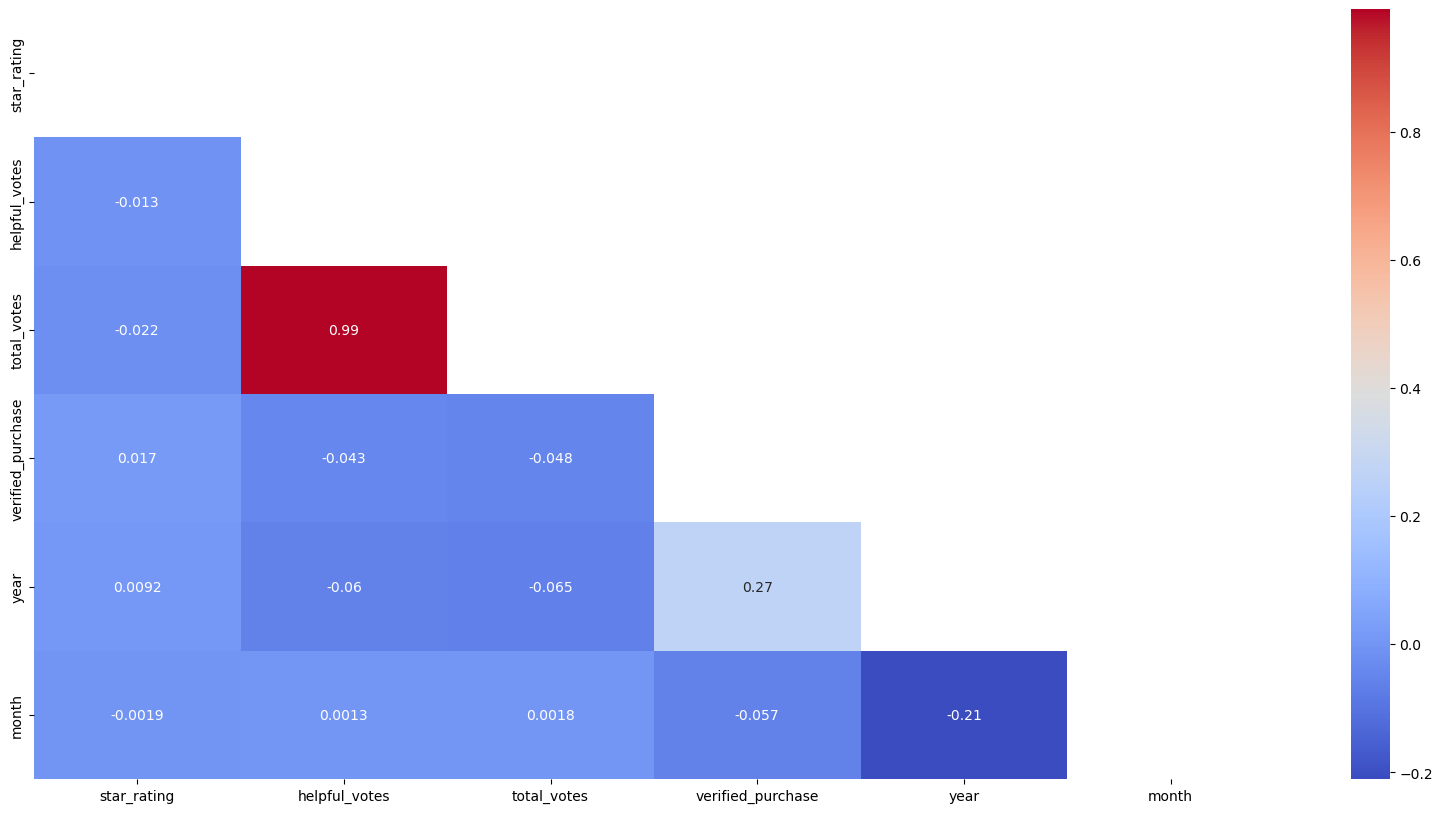

In [54]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20, 10))
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

`total_votes` and `helpful_votes` are highly correlated with each other so one of them will need to be dropped. In this case, it will be `total_votes` since helpful_votes seem more useful.

In [55]:
sampled_df = df2.sample(50000, random_state=1).reset_index(drop=True)
sampled_df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Kickers Men's Jojo Lace-Up Sneaker,1,0,0,1,amazing and so nice one i like kickers but thi...,amazing and so nice one br i like kickers bu...,2014,8
1,Madden Men's M-Gamer Boat Shoe,0,1,1,1,nice shoes,i always buy steve madden always fits perfect...,2013,10
2,Teva Women's Kiru Outdoor Clog,1,0,0,1,my favorite shoes,i love the deep moss green color as it matches...,2014,1
3,Lamo Men's Moc Moccasin,0,10,10,1,quality not so sure,at first they were great comfortable soft k...,2011,3
4,ECCO Men's Track IV Top Stitch High (Rust Leat...,1,0,0,1,outstanding,very comfortable right out of the box good s...,2008,10
...,...,...,...,...,...,...,...,...,...
49995,Easy Spirit Women's Traveltime Mule,1,4,5,0,easy spirit mule,love my easy spirit mules so comfortable and ...,2011,9
49996,"Women's Clarks, Pause Majesty Ankle Boot",0,2,2,1,color lies,this is not the color that i received the col...,2014,8
49997,adidas Men's Kanadia Trail 2 Trail Running Shoe,0,1,2,1,great shoes but not as good as the 1st gen ka...,i love the kanadias by adidas i have owned th...,2010,7
49998,Vasque Women's Inhaler Hiking Boot,1,2,2,1,great boots but order a half size up,had to exchange for a half size up from my usu...,2015,7


In [56]:
sampled_df = sampled_df.drop(columns='total_votes')

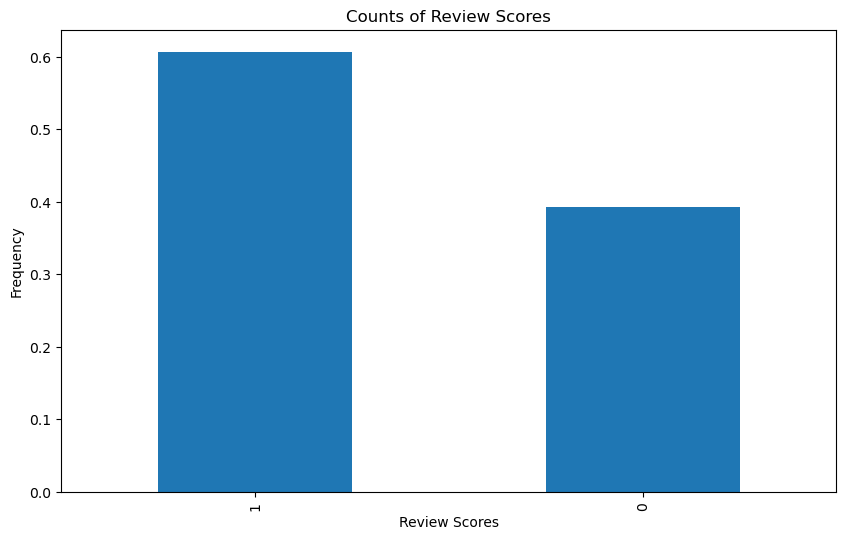

In [57]:
# Sanity check
figure = plt.figure(figsize=(10,6))
sampled_df['star_rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Counts of Review Scores')
plt.show()

After sampling, the classes distribution are still the same. Thus, the first model can be performed which is logistic regression.

#### Train/Test Split

In [61]:
# import the library needed to split
from sklearn.model_selection import train_test_split

# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_remainder_sample, X_test_sample, y_remainder_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [62]:
# Creating a validation set
X_train_sample, X_valid_sample, y_train_sample, y_valid_sample = train_test_split(X_remainder_sample, y_remainder_sample, test_size=0.3, random_state=1, stratify=y_remainder_sample)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [143]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [144]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [145]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250)

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: total: 1.89 s
Wall time: 1.93 s


In [146]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=250)
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: total: 2.16 s
Wall time: 2.17 s


In [147]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [148]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 422 ms
Wall time: 422 ms


In [149]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=50)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 469 ms
Wall time: 464 ms


In [150]:
bag_headline.get_feature_names_out()

array(['10', 'absolutely', 'adorable', 'amazing', 'amazon', 'arch',
       'asics', 'awesome', 'bad', 'bag', 'balance', 'beautiful', 'best',
       'better', 'big', 'bigger', 'bit', 'black', 'boot', 'boots',
       'bought', 'box', 'brand', 'buy', 'casual', 'cheap', 'clarks',
       'color', 'comfort', 'comfortable', 'comfy', 'cool', 'crocs',
       'cute', 'daughter', 'day', 'design', 'did', 'didn', 'disappointed',
       'does', 'don', 'durable', 'easy', 'em', 'excellent', 'expected',
       'extremely', 'fantastic', 'far', 'fast', 'favorite', 'feel',
       'feet', 'fine', 'fit', 'fits', 'flat', 'flip', 'flop', 'flops',
       'foot', 'fun', 'gift', 'good', 'gorgeous', 'got', 'great', 'half',
       'happy', 'hard', 'heel', 'high', 'husband', 'just', 'large',
       'larger', 'leather', 'light', 'like', 'little', 'long', 'look',
       'looking', 'looks', 'lot', 'love', 'loved', 'loves', 'men',
       'money', 'narrow', 'need', 'new', 'nice', 'ok', 'okay', 'old',
       'order', 'or

In [151]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [152]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [153]:
train_count

<28000x490 sparse matrix of type '<class 'numpy.int64'>'
	with 331790 stored elements in Compressed Sparse Row format>

In [154]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [155]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [156]:
len(sample_vocab)

490

In [157]:
train_count

<28000x490 sparse matrix of type '<class 'numpy.int64'>'
	with 331790 stored elements in Compressed Sparse Row format>

In [158]:
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [159]:
# For X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [160]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [161]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [162]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [163]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [164]:
combined_test2

,helpful_votes,verified_purchase,year,month,h_10,h_absolutely,h_adorable,h_amazing,h_amazon,h_ankle,...,b_worked,b_working,b_works,b_worn,b_worth,b_wouldn,b_wrong,b_year,b_years,b_zipper
0,0,1,2010,8,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,1,2011,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2013,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2013,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2015,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2014,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,1,1,2015,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0,1,2015,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,1,2008,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [166]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

#### Logistic Regression

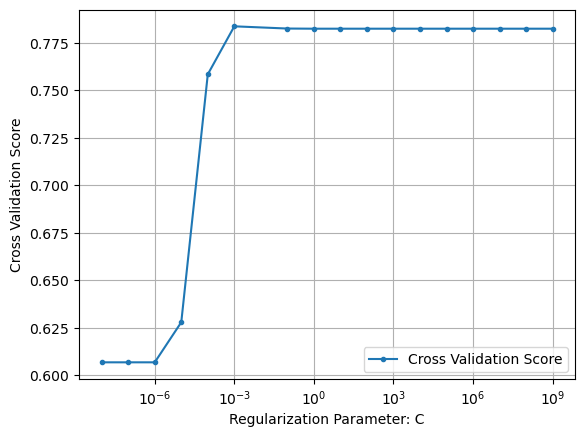

The best model has C =  0.001


In [167]:
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(C=c,random_state=1)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [168]:
log = LogisticRegression(C=1,random_state=1)
log.fit(X_train_scaled, y_train_sample)
log.score(X_test_scaled, y_test_sample)

0.7788

Test accuracy with best hyperparameters is 77.92%. Confusion matrix and classification report should be looked at next to see other metrics.  

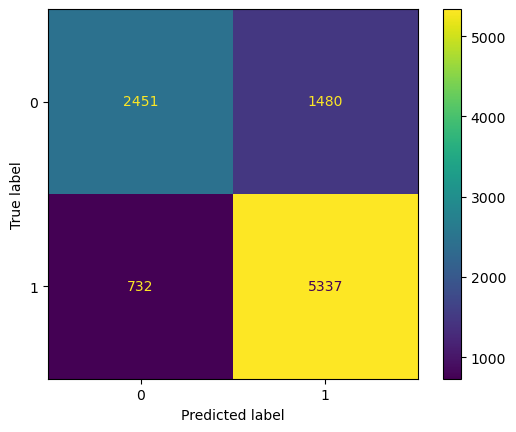

In [169]:
ConfusionMatrixDisplay.from_estimator(log, X_test_scaled, y_test_sample);

In [170]:
# Get rating predictions
y_pred = log.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,2451,1480
True 1,732,5337


              precision    recall  f1-score   support

           0       0.77      0.62      0.69      3931
           1       0.78      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.77     10000



Looking at the classification report, the class imbalance seems to affecting the predictions since recall is 62% so 38% of actual review is being predicted as 1 whereas the recall for 1 is 88%. A difference of 16%.

Looks like the best parameter for C for `lbfgs` was with C=1, with a test score accuracy of 77.92%.

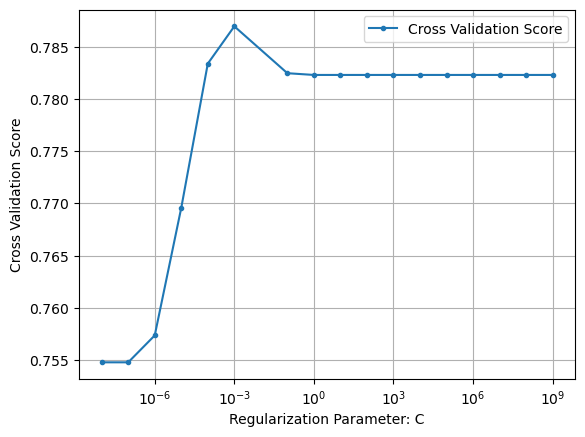

The best model has C =  0.001


In [171]:
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(solver='liblinear', C=c, random_state=1)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [172]:
log2 = LogisticRegression(solver='liblinear', C=0.001, random_state=1)
log2.fit(X_train_scaled, y_train_sample)
log2.score(X_test_scaled, y_test_sample)

0.7791

A solver of `liblinear` with C=0.001 had a test score of 77.95%, an increase of 0.03% compared to the previous solver. 

Test accuracy with best hyperparameters is 77.92%. Confusion matrix and classification report should be looked at next to see other metrics.  

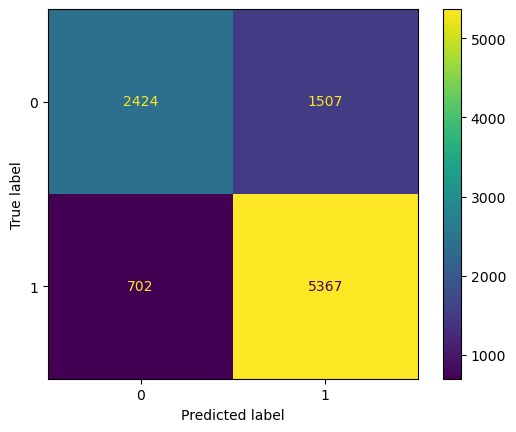

In [173]:
ConfusionMatrixDisplay.from_estimator(log2, X_test_scaled, y_test_sample);

In [174]:
# Get rating predictions
y_pred = log2.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,2424,1507
True 1,702,5367


              precision    recall  f1-score   support

           0       0.78      0.62      0.69      3931
           1       0.78      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.77     10000



The results are similar to the `lbfgs` model with a 1% difference in precision for 0. The rest seems to be the same.

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 38 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 31 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 36 epochs took 5 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 80 epochs took 10 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 623 epochs took 76 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 704 epochs took 86 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 715 epochs took 88 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 87 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 88 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 91 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 85 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 89 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 89 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 88 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 716 epochs took 87 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


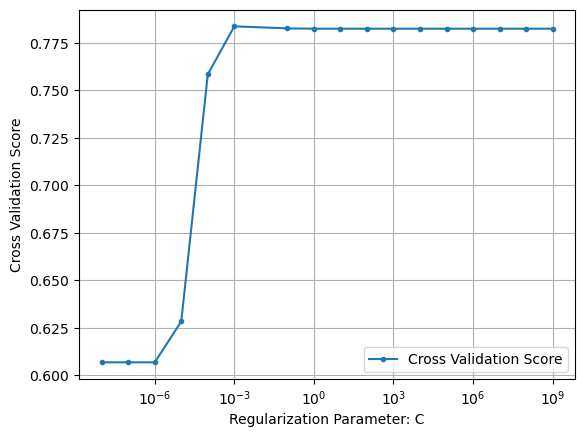

The best model has C =  0.001
CPU times: total: 16min 30s
Wall time: 16min 31s


In [175]:
%%time
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(solver='saga', C=c, random_state=1, max_iter=10000, verbose=1)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [176]:
log3 = LogisticRegression(solver='liblinear', C=0.1, random_state=1)
log3.fit(X_train_scaled, y_train_sample)
log3.score(X_test_scaled, y_test_sample)

0.7793

Test accuracy with best hyperparameters is 78.01%. Confusion matrix and classification report should be looked at next to see other metrics.  

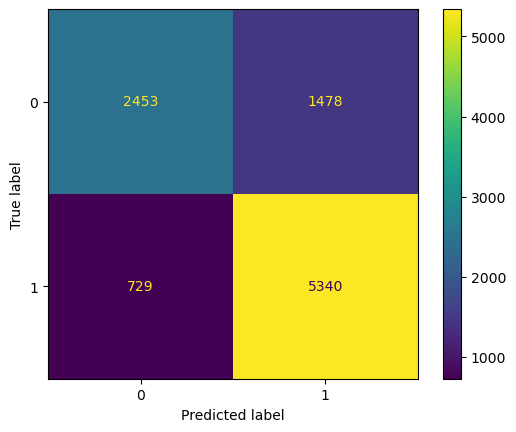

In [177]:
ConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_test_sample)

In [178]:
# Get rating predictions
y_pred = log3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,2453,1478
True 1,729,5340


              precision    recall  f1-score   support

           0       0.77      0.62      0.69      3931
           1       0.78      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.77     10000



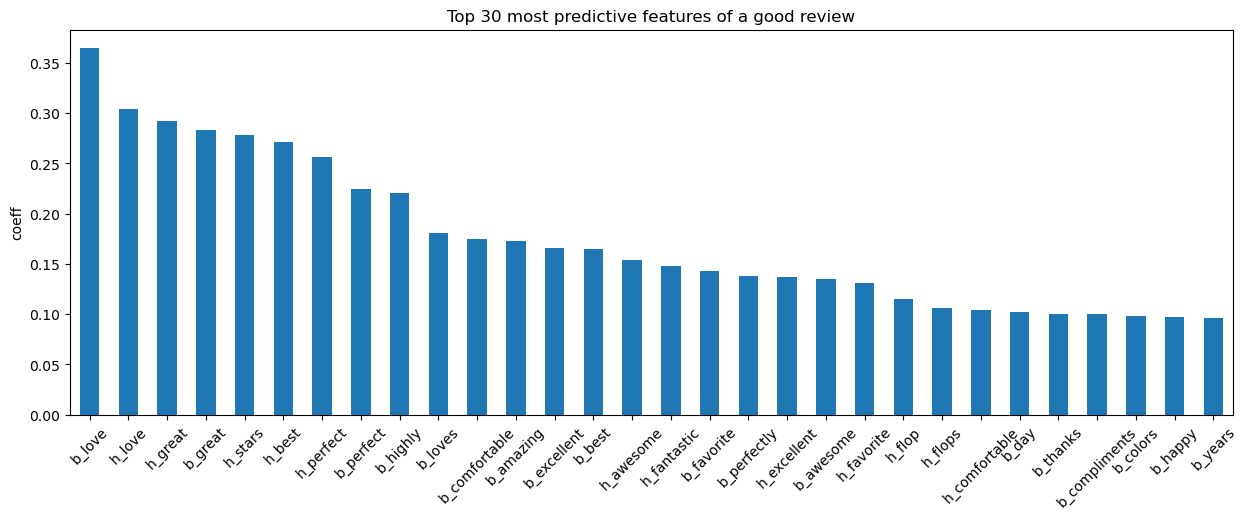

In [179]:
word_counts = pd.DataFrame({"counts":log3.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=False)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a good review")
plt.ylabel("coeff")
plt.xticks(rotation=45)
plt.show()

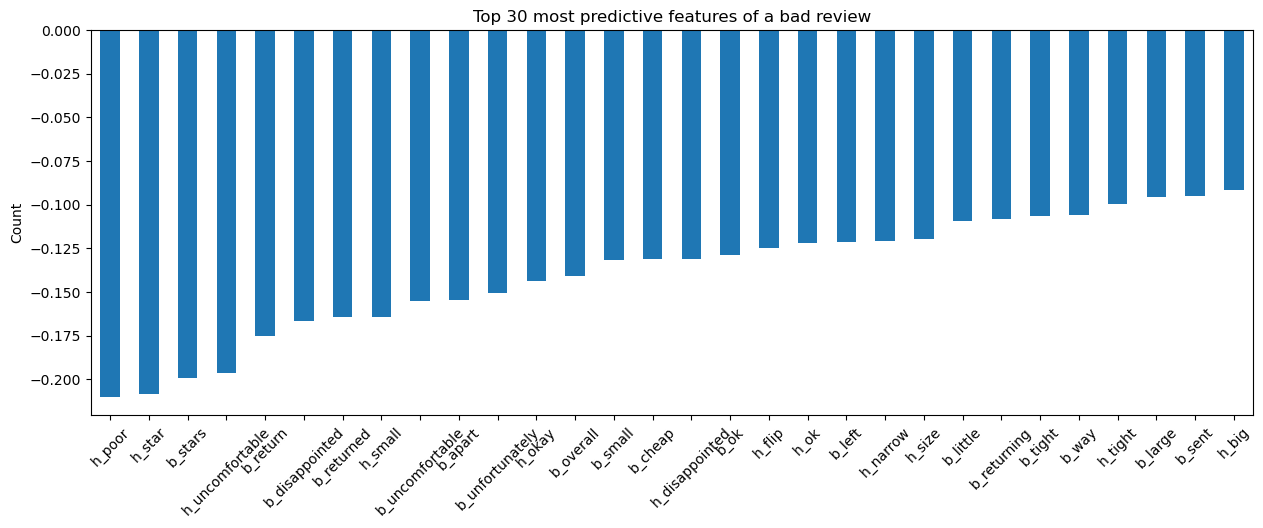

In [180]:
word_counts = pd.DataFrame({"counts":log3.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=True)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a bad review")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### SVMS

In [57]:
SVM = svm.SVC()
SVM.fit(X_train_scaled, y_train_sample)
score = SVM.predict(X_test_scaled)
score

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
%%time
estimators = [('model', svm.SVC())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [svm.SVC()],
             'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_remainder_scaled, y_remainder_sample)

In [89]:
# with open('SVM.pkl', 'wb') as f:
#     pickle.dump(df, f)
# pickle.dump(fittedgrid, "SVM")

In [71]:
fittedgrid.best_score_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 300}

#### XGBoost

In [58]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [2, 3, 4, 5],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [100, 200, 300],
}

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid = grid.fit(X_remainder_scaled, y_remainder_sample)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100; total time=   4.6s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300; total time=  13.8s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
     

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200; total time=  11.2s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
     

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100; total time=   6.4s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
     

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300; total time=  19.2s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
     

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200; total time=  36.8s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
     

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.01, model__max_depth=2, model__n_estimators=100; total time=   4.2s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.01, model__max_depth=2, model__n_estimators=300; total time=  12.9s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200; total time=  11.3s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.01, model__max_depth=4, model__n_estimators=100; total time=   7.7s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.01, model__max_depth=4, model__n_estimators=300; total time=  20.2s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200; total time=  16.9s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.001, model__max_depth=2, model__n_estimators=100; total time=   4.5s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.001, model__max_depth=2, model__n_estimators=300; total time=  12.8s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.001, model__max_depth=3, model__n_estimators=200; total time=  10.7s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.001, model__max_depth=4, model__n_estimators=100; total time=   7.1s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.001, model__max_depth=4, model__n_estimators=300; total time=  20.8s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.001, model__max_depth=5, model__n_estimators=200; total time=  16.8s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

In [59]:
# Get the best parameters and score
best_params = grid.best_params_
best_score = grid.best_score_

In [63]:
best_params

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=300, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 300}

The best hyper parameter for XGBoost is when `learning_rate` is 0.1, `max_depth` is 5, and `n_estimators` is 300.
The model seems to improving still since the best hyper parameter were the highest max_depth and n_estimators allowed so the model might be able to improve if it is set higher.

In [60]:
y_pred = grid.predict(X_test_scaled2)
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      3931
           1       0.79      0.89      0.84      6069

    accuracy                           0.79     10000
   macro avg       0.79      0.76      0.77     10000
weighted avg       0.79      0.79      0.78     10000



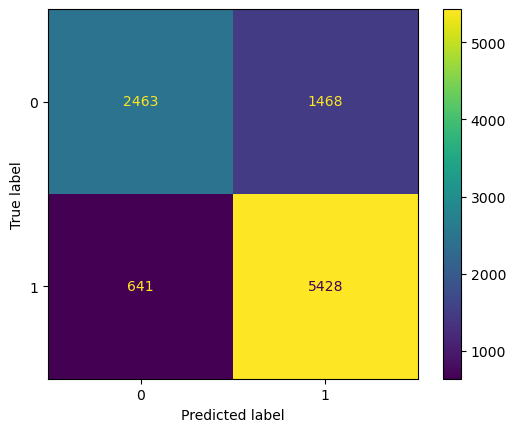

In [61]:
ConfusionMatrixDisplay.from_estimator(grid, X_test_scaled2, y_test_sample);

In [70]:
estimators = [('model', XGBClassifier())]

pipe = Pipeline(estimators)

param_grid = {
    'model': [XGBClassifier()],
    'model__max_depth': [5, 6],
    'model__learning_rate': [1, 0.5],
    'model__n_estimators': [500, 1000],
}

grid2 = GridSearchCV(pipe, param_grid, cv=2, verbose=2)
fittedgrid2 = grid2.fit(X_remainder_scaled, y_remainder_sample)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=1, model__max_depth=5, model__n_estimators=500; total time=  19.1s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
        

[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.5, model__max_depth=5, model__n_estimators=1000; total time=  35.1s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
    

In [72]:
# Get the best parameters and score
best_params = grid2.best_params_
best_score = grid2.best_score_

In [73]:
best_params

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.5, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'model__learning_rate': 0.5,
 'model__max_depth': 5,
 'model__n_estimators': 500}

In [74]:
y_pred = grid2.predict(X_test_scaled2)
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      3931
           1       0.80      0.87      0.83      6069

    accuracy                           0.79     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.79      0.79      0.78     10000



## 2nd model

In [63]:
X_train_review_sample = X_train_sample['review_body']
X_valid_review_sample = X_valid_sample['review_body']
X_test_review_sample = X_test_sample['review_body']

# X_remainder will be needed for when cv is being done
X_remainder_review_sample = X_remainder_sample['review_body']

In [64]:
# sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [65]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250, ngram_range=(1,2))

# Fitting 
bag_body.fit(X_train_review_sample)


# Transform
train_bag_sample = bag_body.transform(X_train_review_sample)
valid_bag_sample = bag_body.transform(X_valid_review_sample)
test_bag_sample = bag_body.transform(X_test_review_sample)

CPU times: total: 6.19 s
Wall time: 8.55 s


In [66]:
%%time
# This one is for X_remainder when cv is not done 

### For X_remainder
bag_body2 = CountVectorizer(stop_words="english", min_df=250, ngram_range=(1,2))
bag_body2.fit(X_remainder_review_sample)
remainder_bag_sample = bag_body2.transform(X_remainder_review_sample)
test_bag_sample2 = bag_body2.transform(X_test_review_sample)

CPU times: total: 6.91 s
Wall time: 8.78 s


In [67]:
X_train_headline_sample = X_train_sample['review_headline']
X_valid_headline_sample = X_valid_sample['review_headline']
X_test_headline_sample = X_test_sample['review_headline']
# X_remainder will be needed for when cv is being done
X_remainder_headline_sample = X_remainder_sample['review_headline']

In [68]:
%%time
# Instantiate
bag_headline = CountVectorizer(stop_words="english", min_df=50, ngram_range=(1,2))

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_headline_sample = bag_headline.transform(X_train_headline_sample)
valid_headline_sample = bag_headline.transform(X_valid_headline_sample)
test_headline_sample = bag_headline.transform(X_test_headline_sample)

CPU times: total: 953 ms
Wall time: 1.08 s


In [69]:
%%time
# For X_remainder
bag_headline2 = CountVectorizer(stop_words="english", min_df=50)
bag_headline2.fit(X_remainder_headline_sample)
remainder_headline_sample = bag_headline2.transform(X_remainder_headline_sample)
test_headline_sample2 = bag_headline2.transform(X_test_headline_sample)

CPU times: total: 844 ms
Wall time: 1.13 s


In [70]:
bag_headline.get_feature_names_out()

array(['10', 'absolutely', 'adorable', 'amazing', 'amazon', 'arch',
       'arch support', 'asics', 'awesome', 'awesome shoes', 'bad', 'bag',
       'balance', 'beautiful', 'best', 'best shoes', 'better', 'big',
       'bigger', 'bit', 'black', 'boot', 'boots', 'bought', 'box',
       'brand', 'buy', 'casual', 'cheap', 'clarks', 'color', 'comfort',
       'comfortable', 'comfortable shoe', 'comfortable shoes', 'comfy',
       'cool', 'crocs', 'cute', 'cute comfortable', 'cute comfy',
       'cute shoe', 'cute shoes', 'daughter', 'day', 'design', 'did',
       'didn', 'disappointed', 'does', 'don', 'durable', 'easy', 'em',
       'excellent', 'expected', 'extremely', 'fantastic', 'far', 'fast',
       'favorite', 'feel', 'feet', 'fine', 'fit', 'fit great', 'fits',
       'flat', 'flip', 'flip flop', 'flip flops', 'flop', 'flops', 'foot',
       'fun', 'gift', 'good', 'good fit', 'good looking', 'good price',
       'good quality', 'good shoe', 'good shoes', 'gorgeous', 'got',
       'gr

In [71]:
# combining headline and bag counts
train_count = sp.hstack([train_headline_sample, train_bag_sample])
valid_count = sp.hstack([valid_headline_sample, valid_bag_sample])
test_count = sp.hstack([test_headline_sample, test_bag_sample])

In [72]:
# combining headline and bag counts
remainder_count = sp.hstack([remainder_headline_sample, remainder_bag_sample])
test_count2 = sp.hstack([test_headline_sample2, test_bag_sample2])

In [73]:
train_count

<28000x585 sparse matrix of type '<class 'numpy.int64'>'
	with 355197 stored elements in Compressed Sparse Row format>

In [74]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [75]:
# FOR X_REMAINDER
body_words2 = bag_body2.get_feature_names_out()
tagged_body_words2 = ['b_' + feature for feature in body_words2]
headline_words2 = bag_headline2.get_feature_names_out()
tagged_headline_words2 = ['h_' + feature for feature in headline_words2]
sample_vocab2 = tagged_headline_words2 + tagged_body_words2

In [76]:
len(sample_vocab)

585

In [77]:
train_count

<28000x585 sparse matrix of type '<class 'numpy.int64'>'
	with 355197 stored elements in Compressed Sparse Row format>

In [78]:
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [79]:
# For X_remainder
remainder_df = pd.DataFrame(remainder_count.toarray(), columns=sample_vocab2)
test_df2 = pd.DataFrame(test_count2.toarray(), columns=sample_vocab2)

In [80]:
X_train_sample = X_train_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_valid_sample = X_valid_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_test_sample = X_test_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [81]:
# For X_remainder
X_remainder_sample = X_remainder_sample.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [82]:
combined_train = pd.concat([X_train_sample, train_df], axis=1)
combined_valid = pd.concat([X_valid_sample, valid_df], axis=1)
combined_test = pd.concat([X_test_sample, test_df], axis=1)

In [83]:
# For X_remainder
combined_remainder = pd.concat([X_remainder_sample, remainder_df], axis=1)
combined_test2 = pd.concat([X_test_sample, test_df2], axis=1)

In [84]:
combined_test2

,helpful_votes,verified_purchase,year,month,h_10,h_absolutely,h_adorable,h_amazing,h_amazon,h_ankle,...,b_working,b_works,b_worn,b_worth,b_wouldn,b_wrong,b_year,b_year old,b_years,b_zipper
0,0,1,2010,8,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,0,1,2011,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2013,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2013,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2015,8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2014,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,1,1,2015,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0,1,2015,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,1,2008,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

In [86]:
# For X_remainder
ss2 = StandardScaler()
X_remainder_scaled = ss.fit_transform(combined_remainder)
X_test_scaled2 = ss.transform(combined_test2)

#### Logistic Regression

In [88]:
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(C=c,random_state=1, max_iter=10000)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

KeyboardInterrupt: 

In [89]:
log = LogisticRegression(C=1,random_state=1)
log.fit(X_train_scaled, y_train_sample)
log.score(X_test_scaled, y_test_sample)

0.7819

Test accuracy with best hyperparameters is 77.92%. Confusion matrix and classification report should be looked at next to see other metrics.  

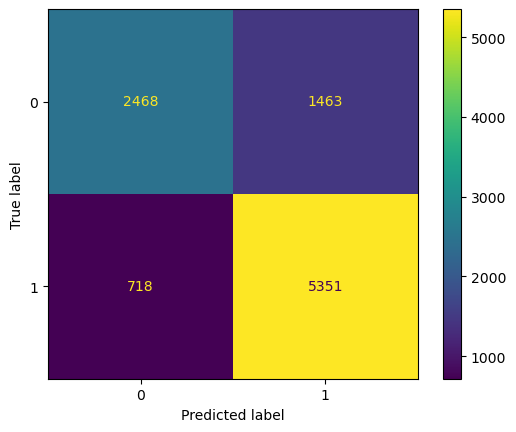

In [90]:
ConfusionMatrixDisplay.from_estimator(log, X_test_scaled, y_test_sample);

In [91]:
# Get rating predictions
y_pred = log.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_sample, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_test_sample, y_pred))

,Predicted 0,Predicted 1
True 0,2468,1463
True 1,718,5351


              precision    recall  f1-score   support

           0       0.77      0.63      0.69      3931
           1       0.79      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.78     10000



Looking at the classification report, the class imbalance seems to affecting the predictions since recall is 62% so 38% of actual review is being predicted as 1 whereas the recall for 1 is 88%. A difference of 16%.

Looks like the best parameter for C for `lbfgs` was with C=1, with a test score accuracy of 77.92%.

In [ ]:
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(solver='liblinear', C=c, random_state=1)
    log.fit(X_train_scaled, y_train_sample)
    scores.append(log.score(X_valid_scaled, y_valid_sample))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [93]:
log2 = LogisticRegression(solver='liblinear', C=0.00001, random_state=1)
log2.fit(X_train_scaled, y_train_sample)
log2.score(X_test_scaled, y_test_sample)

0.766

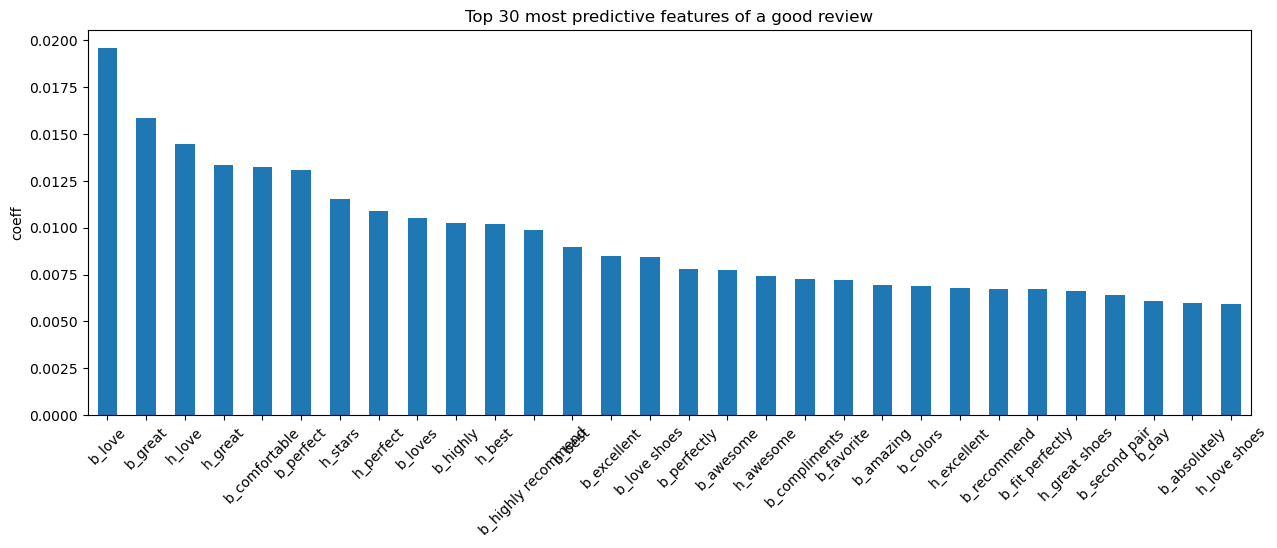

In [94]:
word_counts = pd.DataFrame({"counts":log2.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=False)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a good review")
plt.ylabel("coeff")
plt.xticks(rotation=45)
plt.show()

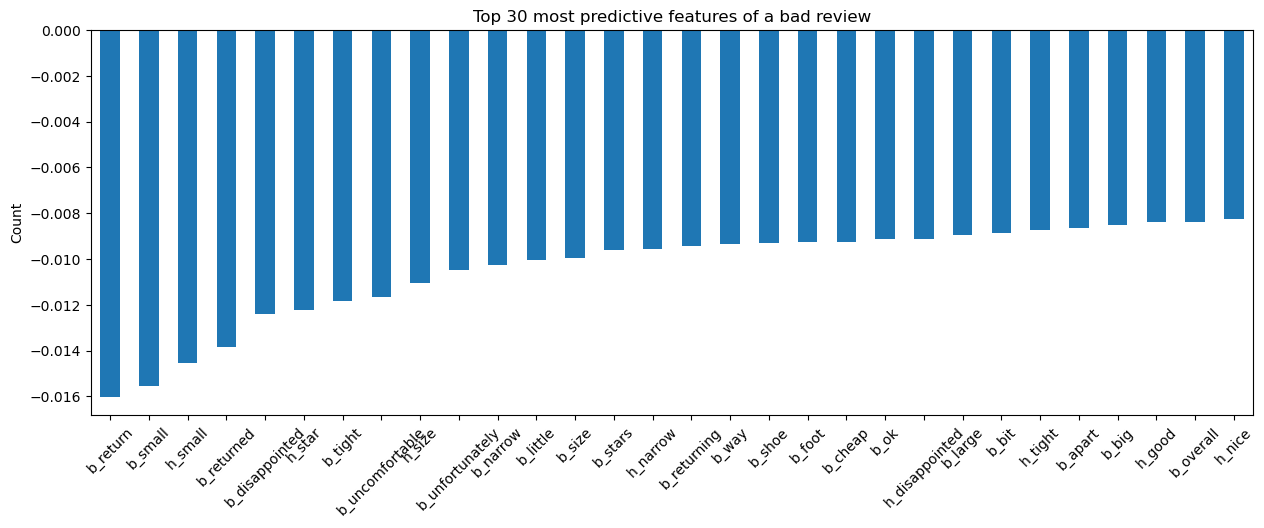

In [95]:
word_counts = pd.DataFrame({"counts":log2.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=True)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a bad review")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### GRIDSEARCH countvectorizer

In [ ]:
estimators = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA()), # Cannot use TSNE as it doesn't have a .transform method
    ('model', LogisticRegression())

]

my_pipe = Pipeline(estimators)

param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), None],
    'dim_reducer': [PCA(), KernelPCA()],
    'dim_reducer__n_components': [1,100,1000]
    'model': [LogisticRegression(solver='saga', random_state=1, max_iter=10000)],
    'model__C': [0.001, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'vectorizer_'
}
vectorizer = CountVectorizer()

grid_logistic = GridSearchCV(pipe, param_grid, cv=5, verbose=2)
fittedgrid_logistic = grid_logistic.fit(X_remainder_scaled, y_remainder_sample)